# Control computer with hand gestures

# Making the model

The following lines describe the creation of a model that detect some gestures through the camera to do some actions in the computer.

The model is a Squential Neural Network make it with Keras.

This work was made it like final project of [Ironhack](https://www.ironhack.com), an intensive 9-week bootcamp of data analytics.

# Code

First of all, we need to import all the libraries used it in the project.

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

We charge the path of all the raw images (download it from a dataset of kaggle). We have 4 gestures: fist, ok, peace and C and negatives images (images where there are not hands).

In [53]:
myFolder = "images/00-images-raw"
imagepaths = set() 

for root, dirs, files in os.walk(myFolder):
    for fileName in files:
        imagepaths.add( os.path.join( root[len(myFolder):], fileName ))

In [54]:
len(imagepaths)

15000

We read the images with **opencv**.

In [55]:
X = [] # Image data
y = [] # Labels 0--> fist, 1--> ok, 2--> peace, 3--> C, 4--> nothing
for path in imagepaths:
    img = cv2.imread(myFolder + path, cv2.COLOR_BGR2GRAY) # Reads image and returns np.array
    X.append(img)

    # Processing label in image path
    category = path.split("/")[1]
    label = int(category[1])
    y.append(label) 

In [34]:
len(X)

15000

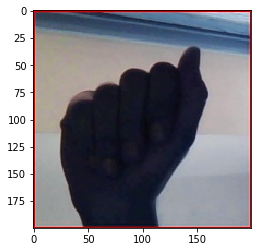

In [49]:
plt.imshow(X[12])

To create a prediction model more solid, we are going to simplificate the images. We need to binarize it: Make the hand white and the background, black.

First of all, we apply a cv2.floodFill to the images to do white the main:

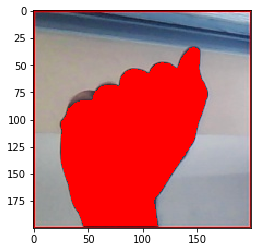

In [48]:
connectivity = 4
flags = connectivity
flags |= cv2.FLOODFILL_FIXED_RANGE
tolerancia = 50
width = X[12].shape[1]
height = X[12].shape[0]

test_image = cv2.floodFill(X[12].copy(), None, (height//2, width//2), (255), (tolerancia,) * 3, (tolerancia,) * 3, flags)

plt.imshow(test_image[1])

Finally, we make a threshold to binarize the photo.

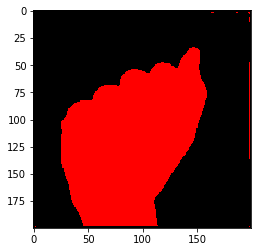

In [50]:
test_image = cv2.threshold(test_image[1],254,255,cv2.THRESH_BINARY)

plt.imshow(test_image[1])

We make this for all the photos grouping in one cell of code

In [56]:
X = []
y = []


connectivity = 4
flags = connectivity
flags |= cv2.FLOODFILL_FIXED_RANGE
tolerancia = 50

def process_image(path):
    new_image = cv2.imread(myFolder + path)
       
    width = new_image.shape[1]
    height = new_image.shape[0]

    new_image = cv2.floodFill(new_image, None, (height//2, width//2), (255), (tolerancia,) * 3, (tolerancia,) * 3, flags)
    
    new_image=cv2.threshold(new_image[1],254,255,cv2.THRESH_BINARY)

    return new_image[1][:,:,0]

for path in imagepaths:
    X.append(process_image(path))

    category = path.split("/")[1]
    label = int(category[0])
    y.append(label)

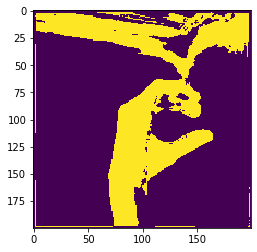

In [59]:
plt.imshow(X[0])

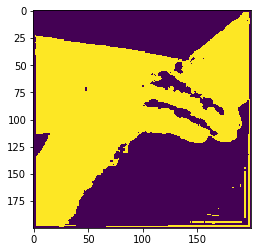

In [62]:
plt.imshow(X[4])

The filter to binarize the photos is applied according the color just in the center pixel. So all the photos where the hand is not in the center are badly binarized. For this reason, we have saved all the black and white photos in a new folder and we have selected **manually** al the good photos.

Finally, we have selected a **dataset with 500 black and white photos for each gesture**.

In [67]:
images_binarized_path = ["00-fist", "11-ok","22-peace", "33-C", "44-nothing"]

for pic in range(len(X)):
    writeStatus =  cv2.imwrite( "images/01-images-binarized/"+ images_binarized_path[y[pic]] + \
                               "/Binary_Image_"+str(pic)+".jpg", X[pic] )
    if writeStatus is True:
        print("Guardada la foto " + str(pic) + " en " + images_binarized_path[y[pic]])
    else:
        print("Problemas al guardar la foto " + str(pic) + " en " + images_binarized_path[y[pic]])

Guardada la foto 0 en 33-C
Guardada la foto 1 en 44-nothing
Guardada la foto 2 en 11-ok
Guardada la foto 3 en 33-C
Guardada la foto 4 en 33-C
Guardada la foto 5 en 22-peace
Guardada la foto 6 en 44-nothing
Guardada la foto 7 en 11-ok
Guardada la foto 8 en 11-ok
Guardada la foto 9 en 00-fist
Guardada la foto 10 en 00-fist
Guardada la foto 11 en 33-C
Guardada la foto 12 en 00-fist
Guardada la foto 13 en 22-peace
Guardada la foto 14 en 22-peace
Guardada la foto 15 en 33-C
Guardada la foto 16 en 33-C
Guardada la foto 17 en 00-fist
Guardada la foto 18 en 11-ok
Guardada la foto 19 en 11-ok
Guardada la foto 20 en 33-C
Guardada la foto 21 en 33-C
Guardada la foto 22 en 33-C
Guardada la foto 23 en 11-ok
Guardada la foto 24 en 11-ok
Guardada la foto 25 en 44-nothing
Guardada la foto 26 en 44-nothing
Guardada la foto 27 en 22-peace
Guardada la foto 28 en 11-ok
Guardada la foto 29 en 11-ok
Guardada la foto 30 en 33-C
Guardada la foto 31 en 33-C
Guardada la foto 32 en 00-fist
Guardada la foto 33 en

Guardada la foto 410 en 22-peace
Guardada la foto 411 en 44-nothing
Guardada la foto 412 en 33-C
Guardada la foto 413 en 11-ok
Guardada la foto 414 en 33-C
Guardada la foto 415 en 33-C
Guardada la foto 416 en 00-fist
Guardada la foto 417 en 33-C
Guardada la foto 418 en 22-peace
Guardada la foto 419 en 22-peace
Guardada la foto 420 en 44-nothing
Guardada la foto 421 en 22-peace
Guardada la foto 422 en 22-peace
Guardada la foto 423 en 33-C
Guardada la foto 424 en 22-peace
Guardada la foto 425 en 00-fist
Guardada la foto 426 en 00-fist
Guardada la foto 427 en 33-C
Guardada la foto 428 en 11-ok
Guardada la foto 429 en 00-fist
Guardada la foto 430 en 44-nothing
Guardada la foto 431 en 33-C
Guardada la foto 432 en 11-ok
Guardada la foto 433 en 11-ok
Guardada la foto 434 en 44-nothing
Guardada la foto 435 en 00-fist
Guardada la foto 436 en 22-peace
Guardada la foto 437 en 33-C
Guardada la foto 438 en 11-ok
Guardada la foto 439 en 44-nothing
Guardada la foto 440 en 33-C
Guardada la foto 441 en

Guardada la foto 869 en 22-peace
Guardada la foto 870 en 11-ok
Guardada la foto 871 en 22-peace
Guardada la foto 872 en 11-ok
Guardada la foto 873 en 22-peace
Guardada la foto 874 en 22-peace
Guardada la foto 875 en 44-nothing
Guardada la foto 876 en 22-peace
Guardada la foto 877 en 11-ok
Guardada la foto 878 en 00-fist
Guardada la foto 879 en 22-peace
Guardada la foto 880 en 33-C
Guardada la foto 881 en 33-C
Guardada la foto 882 en 22-peace
Guardada la foto 883 en 11-ok
Guardada la foto 884 en 22-peace
Guardada la foto 885 en 11-ok
Guardada la foto 886 en 00-fist
Guardada la foto 887 en 11-ok
Guardada la foto 888 en 00-fist
Guardada la foto 889 en 00-fist
Guardada la foto 890 en 00-fist
Guardada la foto 891 en 11-ok
Guardada la foto 892 en 11-ok
Guardada la foto 893 en 00-fist
Guardada la foto 894 en 44-nothing
Guardada la foto 895 en 44-nothing
Guardada la foto 896 en 11-ok
Guardada la foto 897 en 11-ok
Guardada la foto 898 en 11-ok
Guardada la foto 899 en 22-peace
Guardada la foto 9

Guardada la foto 1130 en 33-C
Guardada la foto 1131 en 44-nothing
Guardada la foto 1132 en 00-fist
Guardada la foto 1133 en 33-C
Guardada la foto 1134 en 44-nothing
Guardada la foto 1135 en 22-peace
Guardada la foto 1136 en 11-ok
Guardada la foto 1137 en 22-peace
Guardada la foto 1138 en 22-peace
Guardada la foto 1139 en 22-peace
Guardada la foto 1140 en 33-C
Guardada la foto 1141 en 33-C
Guardada la foto 1142 en 00-fist
Guardada la foto 1143 en 33-C
Guardada la foto 1144 en 11-ok
Guardada la foto 1145 en 11-ok
Guardada la foto 1146 en 44-nothing
Guardada la foto 1147 en 11-ok
Guardada la foto 1148 en 33-C
Guardada la foto 1149 en 33-C
Guardada la foto 1150 en 22-peace
Guardada la foto 1151 en 00-fist
Guardada la foto 1152 en 11-ok
Guardada la foto 1153 en 11-ok
Guardada la foto 1154 en 00-fist
Guardada la foto 1155 en 22-peace
Guardada la foto 1156 en 44-nothing
Guardada la foto 1157 en 00-fist
Guardada la foto 1158 en 33-C
Guardada la foto 1159 en 44-nothing
Guardada la foto 1160 en 

Guardada la foto 1387 en 11-ok
Guardada la foto 1388 en 11-ok
Guardada la foto 1389 en 33-C
Guardada la foto 1390 en 44-nothing
Guardada la foto 1391 en 22-peace
Guardada la foto 1392 en 44-nothing
Guardada la foto 1393 en 11-ok
Guardada la foto 1394 en 00-fist
Guardada la foto 1395 en 22-peace
Guardada la foto 1396 en 44-nothing
Guardada la foto 1397 en 22-peace
Guardada la foto 1398 en 11-ok
Guardada la foto 1399 en 22-peace
Guardada la foto 1400 en 44-nothing
Guardada la foto 1401 en 22-peace
Guardada la foto 1402 en 33-C
Guardada la foto 1403 en 22-peace
Guardada la foto 1404 en 44-nothing
Guardada la foto 1405 en 00-fist
Guardada la foto 1406 en 22-peace
Guardada la foto 1407 en 22-peace
Guardada la foto 1408 en 33-C
Guardada la foto 1409 en 11-ok
Guardada la foto 1410 en 11-ok
Guardada la foto 1411 en 22-peace
Guardada la foto 1412 en 44-nothing
Guardada la foto 1413 en 00-fist
Guardada la foto 1414 en 44-nothing
Guardada la foto 1415 en 22-peace
Guardada la foto 1416 en 11-ok
Gu

Guardada la foto 1638 en 11-ok
Guardada la foto 1639 en 00-fist
Guardada la foto 1640 en 00-fist
Guardada la foto 1641 en 22-peace
Guardada la foto 1642 en 00-fist
Guardada la foto 1643 en 33-C
Guardada la foto 1644 en 11-ok
Guardada la foto 1645 en 22-peace
Guardada la foto 1646 en 11-ok
Guardada la foto 1647 en 44-nothing
Guardada la foto 1648 en 44-nothing
Guardada la foto 1649 en 00-fist
Guardada la foto 1650 en 22-peace
Guardada la foto 1651 en 22-peace
Guardada la foto 1652 en 44-nothing
Guardada la foto 1653 en 11-ok
Guardada la foto 1654 en 33-C
Guardada la foto 1655 en 00-fist
Guardada la foto 1656 en 44-nothing
Guardada la foto 1657 en 44-nothing
Guardada la foto 1658 en 00-fist
Guardada la foto 1659 en 11-ok
Guardada la foto 1660 en 22-peace
Guardada la foto 1661 en 22-peace
Guardada la foto 1662 en 11-ok
Guardada la foto 1663 en 44-nothing
Guardada la foto 1664 en 00-fist
Guardada la foto 1665 en 22-peace
Guardada la foto 1666 en 33-C
Guardada la foto 1667 en 33-C
Guardada 

Guardada la foto 1894 en 11-ok
Guardada la foto 1895 en 22-peace
Guardada la foto 1896 en 22-peace
Guardada la foto 1897 en 22-peace
Guardada la foto 1898 en 44-nothing
Guardada la foto 1899 en 33-C
Guardada la foto 1900 en 00-fist
Guardada la foto 1901 en 44-nothing
Guardada la foto 1902 en 44-nothing
Guardada la foto 1903 en 33-C
Guardada la foto 1904 en 00-fist
Guardada la foto 1905 en 11-ok
Guardada la foto 1906 en 33-C
Guardada la foto 1907 en 44-nothing
Guardada la foto 1908 en 00-fist
Guardada la foto 1909 en 33-C
Guardada la foto 1910 en 22-peace
Guardada la foto 1911 en 22-peace
Guardada la foto 1912 en 11-ok
Guardada la foto 1913 en 00-fist
Guardada la foto 1914 en 00-fist
Guardada la foto 1915 en 00-fist
Guardada la foto 1916 en 00-fist
Guardada la foto 1917 en 22-peace
Guardada la foto 1918 en 33-C
Guardada la foto 1919 en 44-nothing
Guardada la foto 1920 en 33-C
Guardada la foto 1921 en 33-C
Guardada la foto 1922 en 00-fist
Guardada la foto 1923 en 44-nothing
Guardada la f

Guardada la foto 2159 en 11-ok
Guardada la foto 2160 en 00-fist
Guardada la foto 2161 en 11-ok
Guardada la foto 2162 en 22-peace
Guardada la foto 2163 en 33-C
Guardada la foto 2164 en 00-fist
Guardada la foto 2165 en 22-peace
Guardada la foto 2166 en 00-fist
Guardada la foto 2167 en 22-peace
Guardada la foto 2168 en 44-nothing
Guardada la foto 2169 en 44-nothing
Guardada la foto 2170 en 11-ok
Guardada la foto 2171 en 22-peace
Guardada la foto 2172 en 11-ok
Guardada la foto 2173 en 11-ok
Guardada la foto 2174 en 22-peace
Guardada la foto 2175 en 11-ok
Guardada la foto 2176 en 11-ok
Guardada la foto 2177 en 22-peace
Guardada la foto 2178 en 33-C
Guardada la foto 2179 en 33-C
Guardada la foto 2180 en 11-ok
Guardada la foto 2181 en 22-peace
Guardada la foto 2182 en 11-ok
Guardada la foto 2183 en 22-peace
Guardada la foto 2184 en 33-C
Guardada la foto 2185 en 00-fist
Guardada la foto 2186 en 22-peace
Guardada la foto 2187 en 22-peace
Guardada la foto 2188 en 44-nothing
Guardada la foto 2189

Guardada la foto 2418 en 00-fist
Guardada la foto 2419 en 11-ok
Guardada la foto 2420 en 00-fist
Guardada la foto 2421 en 33-C
Guardada la foto 2422 en 00-fist
Guardada la foto 2423 en 00-fist
Guardada la foto 2424 en 33-C
Guardada la foto 2425 en 33-C
Guardada la foto 2426 en 33-C
Guardada la foto 2427 en 44-nothing
Guardada la foto 2428 en 44-nothing
Guardada la foto 2429 en 44-nothing
Guardada la foto 2430 en 44-nothing
Guardada la foto 2431 en 33-C
Guardada la foto 2432 en 00-fist
Guardada la foto 2433 en 22-peace
Guardada la foto 2434 en 44-nothing
Guardada la foto 2435 en 00-fist
Guardada la foto 2436 en 11-ok
Guardada la foto 2437 en 11-ok
Guardada la foto 2438 en 11-ok
Guardada la foto 2439 en 00-fist
Guardada la foto 2440 en 00-fist
Guardada la foto 2441 en 44-nothing
Guardada la foto 2442 en 00-fist
Guardada la foto 2443 en 33-C
Guardada la foto 2444 en 44-nothing
Guardada la foto 2445 en 33-C
Guardada la foto 2446 en 33-C
Guardada la foto 2447 en 00-fist
Guardada la foto 244

Guardada la foto 2679 en 44-nothing
Guardada la foto 2680 en 22-peace
Guardada la foto 2681 en 11-ok
Guardada la foto 2682 en 22-peace
Guardada la foto 2683 en 00-fist
Guardada la foto 2684 en 22-peace
Guardada la foto 2685 en 44-nothing
Guardada la foto 2686 en 22-peace
Guardada la foto 2687 en 22-peace
Guardada la foto 2688 en 00-fist
Guardada la foto 2689 en 22-peace
Guardada la foto 2690 en 00-fist
Guardada la foto 2691 en 00-fist
Guardada la foto 2692 en 00-fist
Guardada la foto 2693 en 33-C
Guardada la foto 2694 en 33-C
Guardada la foto 2695 en 22-peace
Guardada la foto 2696 en 44-nothing
Guardada la foto 2697 en 00-fist
Guardada la foto 2698 en 44-nothing
Guardada la foto 2699 en 44-nothing
Guardada la foto 2700 en 11-ok
Guardada la foto 2701 en 33-C
Guardada la foto 2702 en 00-fist
Guardada la foto 2703 en 44-nothing
Guardada la foto 2704 en 11-ok
Guardada la foto 2705 en 33-C
Guardada la foto 2706 en 33-C
Guardada la foto 2707 en 11-ok
Guardada la foto 2708 en 11-ok
Guardada l

Guardada la foto 2949 en 00-fist
Guardada la foto 2950 en 00-fist
Guardada la foto 2951 en 00-fist
Guardada la foto 2952 en 22-peace
Guardada la foto 2953 en 00-fist
Guardada la foto 2954 en 00-fist
Guardada la foto 2955 en 11-ok
Guardada la foto 2956 en 00-fist
Guardada la foto 2957 en 11-ok
Guardada la foto 2958 en 00-fist
Guardada la foto 2959 en 44-nothing
Guardada la foto 2960 en 22-peace
Guardada la foto 2961 en 11-ok
Guardada la foto 2962 en 00-fist
Guardada la foto 2963 en 44-nothing
Guardada la foto 2964 en 44-nothing
Guardada la foto 2965 en 44-nothing
Guardada la foto 2966 en 33-C
Guardada la foto 2967 en 44-nothing
Guardada la foto 2968 en 33-C
Guardada la foto 2969 en 44-nothing
Guardada la foto 2970 en 22-peace
Guardada la foto 2971 en 44-nothing
Guardada la foto 2972 en 33-C
Guardada la foto 2973 en 00-fist
Guardada la foto 2974 en 33-C
Guardada la foto 2975 en 11-ok
Guardada la foto 2976 en 44-nothing
Guardada la foto 2977 en 33-C
Guardada la foto 2978 en 11-ok
Guardada

Guardada la foto 3207 en 44-nothing
Guardada la foto 3208 en 11-ok
Guardada la foto 3209 en 22-peace
Guardada la foto 3210 en 44-nothing
Guardada la foto 3211 en 22-peace
Guardada la foto 3212 en 11-ok
Guardada la foto 3213 en 22-peace
Guardada la foto 3214 en 22-peace
Guardada la foto 3215 en 33-C
Guardada la foto 3216 en 11-ok
Guardada la foto 3217 en 44-nothing
Guardada la foto 3218 en 44-nothing
Guardada la foto 3219 en 11-ok
Guardada la foto 3220 en 11-ok
Guardada la foto 3221 en 33-C
Guardada la foto 3222 en 00-fist
Guardada la foto 3223 en 00-fist
Guardada la foto 3224 en 00-fist
Guardada la foto 3225 en 44-nothing
Guardada la foto 3226 en 44-nothing
Guardada la foto 3227 en 44-nothing
Guardada la foto 3228 en 22-peace
Guardada la foto 3229 en 11-ok
Guardada la foto 3230 en 00-fist
Guardada la foto 3231 en 22-peace
Guardada la foto 3232 en 22-peace
Guardada la foto 3233 en 44-nothing
Guardada la foto 3234 en 11-ok
Guardada la foto 3235 en 11-ok
Guardada la foto 3236 en 11-ok
Gua

Guardada la foto 3466 en 22-peace
Guardada la foto 3467 en 11-ok
Guardada la foto 3468 en 33-C
Guardada la foto 3469 en 44-nothing
Guardada la foto 3470 en 11-ok
Guardada la foto 3471 en 22-peace
Guardada la foto 3472 en 00-fist
Guardada la foto 3473 en 44-nothing
Guardada la foto 3474 en 11-ok
Guardada la foto 3475 en 22-peace
Guardada la foto 3476 en 00-fist
Guardada la foto 3477 en 33-C
Guardada la foto 3478 en 22-peace
Guardada la foto 3479 en 44-nothing
Guardada la foto 3480 en 11-ok
Guardada la foto 3481 en 33-C
Guardada la foto 3482 en 33-C
Guardada la foto 3483 en 11-ok
Guardada la foto 3484 en 22-peace
Guardada la foto 3485 en 33-C
Guardada la foto 3486 en 33-C
Guardada la foto 3487 en 22-peace
Guardada la foto 3488 en 00-fist
Guardada la foto 3489 en 44-nothing
Guardada la foto 3490 en 33-C
Guardada la foto 3491 en 11-ok
Guardada la foto 3492 en 11-ok
Guardada la foto 3493 en 44-nothing
Guardada la foto 3494 en 22-peace
Guardada la foto 3495 en 22-peace
Guardada la foto 3496 

Guardada la foto 3722 en 22-peace
Guardada la foto 3723 en 11-ok
Guardada la foto 3724 en 22-peace
Guardada la foto 3725 en 33-C
Guardada la foto 3726 en 00-fist
Guardada la foto 3727 en 33-C
Guardada la foto 3728 en 11-ok
Guardada la foto 3729 en 33-C
Guardada la foto 3730 en 22-peace
Guardada la foto 3731 en 11-ok
Guardada la foto 3732 en 22-peace
Guardada la foto 3733 en 22-peace
Guardada la foto 3734 en 44-nothing
Guardada la foto 3735 en 00-fist
Guardada la foto 3736 en 22-peace
Guardada la foto 3737 en 33-C
Guardada la foto 3738 en 44-nothing
Guardada la foto 3739 en 33-C
Guardada la foto 3740 en 33-C
Guardada la foto 3741 en 44-nothing
Guardada la foto 3742 en 22-peace
Guardada la foto 3743 en 11-ok
Guardada la foto 3744 en 11-ok
Guardada la foto 3745 en 33-C
Guardada la foto 3746 en 11-ok
Guardada la foto 3747 en 33-C
Guardada la foto 3748 en 33-C
Guardada la foto 3749 en 44-nothing
Guardada la foto 3750 en 44-nothing
Guardada la foto 3751 en 00-fist
Guardada la foto 3752 en 11

Guardada la foto 3972 en 44-nothing
Guardada la foto 3973 en 11-ok
Guardada la foto 3974 en 33-C
Guardada la foto 3975 en 22-peace
Guardada la foto 3976 en 44-nothing
Guardada la foto 3977 en 33-C
Guardada la foto 3978 en 22-peace
Guardada la foto 3979 en 11-ok
Guardada la foto 3980 en 22-peace
Guardada la foto 3981 en 33-C
Guardada la foto 3982 en 44-nothing
Guardada la foto 3983 en 00-fist
Guardada la foto 3984 en 33-C
Guardada la foto 3985 en 33-C
Guardada la foto 3986 en 33-C
Guardada la foto 3987 en 22-peace
Guardada la foto 3988 en 33-C
Guardada la foto 3989 en 44-nothing
Guardada la foto 3990 en 33-C
Guardada la foto 3991 en 22-peace
Guardada la foto 3992 en 33-C
Guardada la foto 3993 en 44-nothing
Guardada la foto 3994 en 22-peace
Guardada la foto 3995 en 44-nothing
Guardada la foto 3996 en 33-C
Guardada la foto 3997 en 00-fist
Guardada la foto 3998 en 44-nothing
Guardada la foto 3999 en 00-fist
Guardada la foto 4000 en 00-fist
Guardada la foto 4001 en 22-peace
Guardada la foto

Guardada la foto 4223 en 33-C
Guardada la foto 4224 en 44-nothing
Guardada la foto 4225 en 11-ok
Guardada la foto 4226 en 11-ok
Guardada la foto 4227 en 44-nothing
Guardada la foto 4228 en 11-ok
Guardada la foto 4229 en 00-fist
Guardada la foto 4230 en 22-peace
Guardada la foto 4231 en 22-peace
Guardada la foto 4232 en 33-C
Guardada la foto 4233 en 22-peace
Guardada la foto 4234 en 00-fist
Guardada la foto 4235 en 33-C
Guardada la foto 4236 en 11-ok
Guardada la foto 4237 en 11-ok
Guardada la foto 4238 en 11-ok
Guardada la foto 4239 en 11-ok
Guardada la foto 4240 en 00-fist
Guardada la foto 4241 en 22-peace
Guardada la foto 4242 en 00-fist
Guardada la foto 4243 en 00-fist
Guardada la foto 4244 en 33-C
Guardada la foto 4245 en 33-C
Guardada la foto 4246 en 33-C
Guardada la foto 4247 en 11-ok
Guardada la foto 4248 en 00-fist
Guardada la foto 4249 en 44-nothing
Guardada la foto 4250 en 44-nothing
Guardada la foto 4251 en 44-nothing
Guardada la foto 4252 en 00-fist
Guardada la foto 4253 en 

Guardada la foto 4868 en 22-peace
Guardada la foto 4869 en 11-ok
Guardada la foto 4870 en 44-nothing
Guardada la foto 4871 en 00-fist
Guardada la foto 4872 en 00-fist
Guardada la foto 4873 en 22-peace
Guardada la foto 4874 en 00-fist
Guardada la foto 4875 en 22-peace
Guardada la foto 4876 en 33-C
Guardada la foto 4877 en 44-nothing
Guardada la foto 4878 en 33-C
Guardada la foto 4879 en 44-nothing
Guardada la foto 4880 en 22-peace
Guardada la foto 4881 en 44-nothing
Guardada la foto 4882 en 44-nothing
Guardada la foto 4883 en 22-peace
Guardada la foto 4884 en 22-peace
Guardada la foto 4885 en 22-peace
Guardada la foto 4886 en 11-ok
Guardada la foto 4887 en 00-fist
Guardada la foto 4888 en 33-C
Guardada la foto 4889 en 33-C
Guardada la foto 4890 en 33-C
Guardada la foto 4891 en 00-fist
Guardada la foto 4892 en 22-peace
Guardada la foto 4893 en 44-nothing
Guardada la foto 4894 en 33-C
Guardada la foto 4895 en 11-ok
Guardada la foto 4896 en 33-C
Guardada la foto 4897 en 33-C
Guardada la fo

Guardada la foto 5302 en 44-nothing
Guardada la foto 5303 en 00-fist
Guardada la foto 5304 en 33-C
Guardada la foto 5305 en 44-nothing
Guardada la foto 5306 en 22-peace
Guardada la foto 5307 en 00-fist
Guardada la foto 5308 en 11-ok
Guardada la foto 5309 en 11-ok
Guardada la foto 5310 en 00-fist
Guardada la foto 5311 en 33-C
Guardada la foto 5312 en 33-C
Guardada la foto 5313 en 22-peace
Guardada la foto 5314 en 00-fist
Guardada la foto 5315 en 11-ok
Guardada la foto 5316 en 00-fist
Guardada la foto 5317 en 33-C
Guardada la foto 5318 en 11-ok
Guardada la foto 5319 en 11-ok
Guardada la foto 5320 en 11-ok
Guardada la foto 5321 en 11-ok
Guardada la foto 5322 en 22-peace
Guardada la foto 5323 en 44-nothing
Guardada la foto 5324 en 22-peace
Guardada la foto 5325 en 33-C
Guardada la foto 5326 en 44-nothing
Guardada la foto 5327 en 33-C
Guardada la foto 5328 en 11-ok
Guardada la foto 5329 en 33-C
Guardada la foto 5330 en 11-ok
Guardada la foto 5331 en 00-fist
Guardada la foto 5332 en 33-C
Gua

Guardada la foto 5630 en 00-fist
Guardada la foto 5631 en 33-C
Guardada la foto 5632 en 33-C
Guardada la foto 5633 en 00-fist
Guardada la foto 5634 en 00-fist
Guardada la foto 5635 en 22-peace
Guardada la foto 5636 en 22-peace
Guardada la foto 5637 en 00-fist
Guardada la foto 5638 en 33-C
Guardada la foto 5639 en 44-nothing
Guardada la foto 5640 en 00-fist
Guardada la foto 5641 en 22-peace
Guardada la foto 5642 en 11-ok
Guardada la foto 5643 en 11-ok
Guardada la foto 5644 en 22-peace
Guardada la foto 5645 en 11-ok
Guardada la foto 5646 en 11-ok
Guardada la foto 5647 en 22-peace
Guardada la foto 5648 en 11-ok
Guardada la foto 5649 en 33-C
Guardada la foto 5650 en 00-fist
Guardada la foto 5651 en 44-nothing
Guardada la foto 5652 en 22-peace
Guardada la foto 5653 en 11-ok
Guardada la foto 5654 en 33-C
Guardada la foto 5655 en 22-peace
Guardada la foto 5656 en 00-fist
Guardada la foto 5657 en 44-nothing
Guardada la foto 5658 en 11-ok
Guardada la foto 5659 en 11-ok
Guardada la foto 5660 en 

Guardada la foto 6094 en 44-nothing
Guardada la foto 6095 en 00-fist
Guardada la foto 6096 en 22-peace
Guardada la foto 6097 en 00-fist
Guardada la foto 6098 en 00-fist
Guardada la foto 6099 en 00-fist
Guardada la foto 6100 en 00-fist
Guardada la foto 6101 en 44-nothing
Guardada la foto 6102 en 22-peace
Guardada la foto 6103 en 22-peace
Guardada la foto 6104 en 33-C
Guardada la foto 6105 en 22-peace
Guardada la foto 6106 en 22-peace
Guardada la foto 6107 en 33-C
Guardada la foto 6108 en 00-fist
Guardada la foto 6109 en 44-nothing
Guardada la foto 6110 en 00-fist
Guardada la foto 6111 en 11-ok
Guardada la foto 6112 en 00-fist
Guardada la foto 6113 en 11-ok
Guardada la foto 6114 en 44-nothing
Guardada la foto 6115 en 33-C
Guardada la foto 6116 en 22-peace
Guardada la foto 6117 en 44-nothing
Guardada la foto 6118 en 33-C
Guardada la foto 6119 en 44-nothing
Guardada la foto 6120 en 00-fist
Guardada la foto 6121 en 22-peace
Guardada la foto 6122 en 33-C
Guardada la foto 6123 en 33-C
Guardad

Guardada la foto 6577 en 11-ok
Guardada la foto 6578 en 33-C
Guardada la foto 6579 en 33-C
Guardada la foto 6580 en 11-ok
Guardada la foto 6581 en 33-C
Guardada la foto 6582 en 11-ok
Guardada la foto 6583 en 00-fist
Guardada la foto 6584 en 00-fist
Guardada la foto 6585 en 33-C
Guardada la foto 6586 en 33-C
Guardada la foto 6587 en 33-C
Guardada la foto 6588 en 22-peace
Guardada la foto 6589 en 22-peace
Guardada la foto 6590 en 11-ok
Guardada la foto 6591 en 11-ok
Guardada la foto 6592 en 00-fist
Guardada la foto 6593 en 22-peace
Guardada la foto 6594 en 22-peace
Guardada la foto 6595 en 00-fist
Guardada la foto 6596 en 22-peace
Guardada la foto 6597 en 44-nothing
Guardada la foto 6598 en 11-ok
Guardada la foto 6599 en 33-C
Guardada la foto 6600 en 00-fist
Guardada la foto 6601 en 00-fist
Guardada la foto 6602 en 33-C
Guardada la foto 6603 en 22-peace
Guardada la foto 6604 en 00-fist
Guardada la foto 6605 en 22-peace
Guardada la foto 6606 en 11-ok
Guardada la foto 6607 en 00-fist
Guard

Guardada la foto 7039 en 22-peace
Guardada la foto 7040 en 33-C
Guardada la foto 7041 en 22-peace
Guardada la foto 7042 en 22-peace
Guardada la foto 7043 en 44-nothing
Guardada la foto 7044 en 22-peace
Guardada la foto 7045 en 11-ok
Guardada la foto 7046 en 11-ok
Guardada la foto 7047 en 11-ok
Guardada la foto 7048 en 00-fist
Guardada la foto 7049 en 00-fist
Guardada la foto 7050 en 44-nothing
Guardada la foto 7051 en 22-peace
Guardada la foto 7052 en 00-fist
Guardada la foto 7053 en 11-ok
Guardada la foto 7054 en 22-peace
Guardada la foto 7055 en 33-C
Guardada la foto 7056 en 22-peace
Guardada la foto 7057 en 22-peace
Guardada la foto 7058 en 44-nothing
Guardada la foto 7059 en 33-C
Guardada la foto 7060 en 33-C
Guardada la foto 7061 en 00-fist
Guardada la foto 7062 en 33-C
Guardada la foto 7063 en 33-C
Guardada la foto 7064 en 33-C
Guardada la foto 7065 en 11-ok
Guardada la foto 7066 en 11-ok
Guardada la foto 7067 en 00-fist
Guardada la foto 7068 en 00-fist
Guardada la foto 7069 en 0

Guardada la foto 7393 en 22-peace
Guardada la foto 7394 en 33-C
Guardada la foto 7395 en 11-ok
Guardada la foto 7396 en 33-C
Guardada la foto 7397 en 11-ok
Guardada la foto 7398 en 11-ok
Guardada la foto 7399 en 11-ok
Guardada la foto 7400 en 11-ok
Guardada la foto 7401 en 22-peace
Guardada la foto 7402 en 44-nothing
Guardada la foto 7403 en 11-ok
Guardada la foto 7404 en 11-ok
Guardada la foto 7405 en 00-fist
Guardada la foto 7406 en 00-fist
Guardada la foto 7407 en 44-nothing
Guardada la foto 7408 en 11-ok
Guardada la foto 7409 en 44-nothing
Guardada la foto 7410 en 22-peace
Guardada la foto 7411 en 00-fist
Guardada la foto 7412 en 00-fist
Guardada la foto 7413 en 22-peace
Guardada la foto 7414 en 11-ok
Guardada la foto 7415 en 44-nothing
Guardada la foto 7416 en 11-ok
Guardada la foto 7417 en 33-C
Guardada la foto 7418 en 33-C
Guardada la foto 7419 en 00-fist
Guardada la foto 7420 en 11-ok
Guardada la foto 7421 en 33-C
Guardada la foto 7422 en 22-peace
Guardada la foto 7423 en 33-C


Guardada la foto 7787 en 33-C
Guardada la foto 7788 en 00-fist
Guardada la foto 7789 en 00-fist
Guardada la foto 7790 en 44-nothing
Guardada la foto 7791 en 11-ok
Guardada la foto 7792 en 00-fist
Guardada la foto 7793 en 33-C
Guardada la foto 7794 en 33-C
Guardada la foto 7795 en 11-ok
Guardada la foto 7796 en 00-fist
Guardada la foto 7797 en 00-fist
Guardada la foto 7798 en 22-peace
Guardada la foto 7799 en 44-nothing
Guardada la foto 7800 en 44-nothing
Guardada la foto 7801 en 22-peace
Guardada la foto 7802 en 11-ok
Guardada la foto 7803 en 11-ok
Guardada la foto 7804 en 00-fist
Guardada la foto 7805 en 22-peace
Guardada la foto 7806 en 22-peace
Guardada la foto 7807 en 44-nothing
Guardada la foto 7808 en 11-ok
Guardada la foto 7809 en 00-fist
Guardada la foto 7810 en 33-C
Guardada la foto 7811 en 00-fist
Guardada la foto 7812 en 11-ok
Guardada la foto 7813 en 44-nothing
Guardada la foto 7814 en 11-ok
Guardada la foto 7815 en 00-fist
Guardada la foto 7816 en 11-ok
Guardada la foto 78

Guardada la foto 8192 en 33-C
Guardada la foto 8193 en 33-C
Guardada la foto 8194 en 22-peace
Guardada la foto 8195 en 22-peace
Guardada la foto 8196 en 44-nothing
Guardada la foto 8197 en 11-ok
Guardada la foto 8198 en 11-ok
Guardada la foto 8199 en 22-peace
Guardada la foto 8200 en 33-C
Guardada la foto 8201 en 33-C
Guardada la foto 8202 en 22-peace
Guardada la foto 8203 en 33-C
Guardada la foto 8204 en 11-ok
Guardada la foto 8205 en 33-C
Guardada la foto 8206 en 00-fist
Guardada la foto 8207 en 22-peace
Guardada la foto 8208 en 00-fist
Guardada la foto 8209 en 33-C
Guardada la foto 8210 en 11-ok
Guardada la foto 8211 en 00-fist
Guardada la foto 8212 en 33-C
Guardada la foto 8213 en 22-peace
Guardada la foto 8214 en 44-nothing
Guardada la foto 8215 en 22-peace
Guardada la foto 8216 en 11-ok
Guardada la foto 8217 en 11-ok
Guardada la foto 8218 en 00-fist
Guardada la foto 8219 en 22-peace
Guardada la foto 8220 en 44-nothing
Guardada la foto 8221 en 44-nothing
Guardada la foto 8222 en 2

Guardada la foto 8590 en 00-fist
Guardada la foto 8591 en 33-C
Guardada la foto 8592 en 00-fist
Guardada la foto 8593 en 22-peace
Guardada la foto 8594 en 33-C
Guardada la foto 8595 en 11-ok
Guardada la foto 8596 en 33-C
Guardada la foto 8597 en 33-C
Guardada la foto 8598 en 44-nothing
Guardada la foto 8599 en 11-ok
Guardada la foto 8600 en 33-C
Guardada la foto 8601 en 11-ok
Guardada la foto 8602 en 44-nothing
Guardada la foto 8603 en 22-peace
Guardada la foto 8604 en 44-nothing
Guardada la foto 8605 en 44-nothing
Guardada la foto 8606 en 11-ok
Guardada la foto 8607 en 00-fist
Guardada la foto 8608 en 00-fist
Guardada la foto 8609 en 33-C
Guardada la foto 8610 en 00-fist
Guardada la foto 8611 en 33-C
Guardada la foto 8612 en 33-C
Guardada la foto 8613 en 44-nothing
Guardada la foto 8614 en 33-C
Guardada la foto 8615 en 33-C
Guardada la foto 8616 en 44-nothing
Guardada la foto 8617 en 22-peace
Guardada la foto 8618 en 11-ok
Guardada la foto 8619 en 33-C
Guardada la foto 8620 en 11-ok
G

Guardada la foto 9004 en 11-ok
Guardada la foto 9005 en 00-fist
Guardada la foto 9006 en 00-fist
Guardada la foto 9007 en 00-fist
Guardada la foto 9008 en 22-peace
Guardada la foto 9009 en 00-fist
Guardada la foto 9010 en 00-fist
Guardada la foto 9011 en 22-peace
Guardada la foto 9012 en 00-fist
Guardada la foto 9013 en 22-peace
Guardada la foto 9014 en 33-C
Guardada la foto 9015 en 00-fist
Guardada la foto 9016 en 11-ok
Guardada la foto 9017 en 33-C
Guardada la foto 9018 en 11-ok
Guardada la foto 9019 en 11-ok
Guardada la foto 9020 en 33-C
Guardada la foto 9021 en 44-nothing
Guardada la foto 9022 en 33-C
Guardada la foto 9023 en 22-peace
Guardada la foto 9024 en 44-nothing
Guardada la foto 9025 en 11-ok
Guardada la foto 9026 en 33-C
Guardada la foto 9027 en 00-fist
Guardada la foto 9028 en 44-nothing
Guardada la foto 9029 en 11-ok
Guardada la foto 9030 en 44-nothing
Guardada la foto 9031 en 22-peace
Guardada la foto 9032 en 44-nothing
Guardada la foto 9033 en 44-nothing
Guardada la fo

Guardada la foto 9411 en 11-ok
Guardada la foto 9412 en 00-fist
Guardada la foto 9413 en 44-nothing
Guardada la foto 9414 en 11-ok
Guardada la foto 9415 en 11-ok
Guardada la foto 9416 en 00-fist
Guardada la foto 9417 en 33-C
Guardada la foto 9418 en 00-fist
Guardada la foto 9419 en 33-C
Guardada la foto 9420 en 22-peace
Guardada la foto 9421 en 22-peace
Guardada la foto 9422 en 00-fist
Guardada la foto 9423 en 22-peace
Guardada la foto 9424 en 22-peace
Guardada la foto 9425 en 11-ok
Guardada la foto 9426 en 33-C
Guardada la foto 9427 en 11-ok
Guardada la foto 9428 en 22-peace
Guardada la foto 9429 en 44-nothing
Guardada la foto 9430 en 44-nothing
Guardada la foto 9431 en 44-nothing
Guardada la foto 9432 en 00-fist
Guardada la foto 9433 en 22-peace
Guardada la foto 9434 en 44-nothing
Guardada la foto 9435 en 33-C
Guardada la foto 9436 en 22-peace
Guardada la foto 9437 en 00-fist
Guardada la foto 9438 en 11-ok
Guardada la foto 9439 en 33-C
Guardada la foto 9440 en 00-fist
Guardada la fot

Guardada la foto 9826 en 44-nothing
Guardada la foto 9827 en 11-ok
Guardada la foto 9828 en 33-C
Guardada la foto 9829 en 11-ok
Guardada la foto 9830 en 00-fist
Guardada la foto 9831 en 44-nothing
Guardada la foto 9832 en 11-ok
Guardada la foto 9833 en 33-C
Guardada la foto 9834 en 22-peace
Guardada la foto 9835 en 11-ok
Guardada la foto 9836 en 33-C
Guardada la foto 9837 en 00-fist
Guardada la foto 9838 en 11-ok
Guardada la foto 9839 en 44-nothing
Guardada la foto 9840 en 11-ok
Guardada la foto 9841 en 11-ok
Guardada la foto 9842 en 33-C
Guardada la foto 9843 en 00-fist
Guardada la foto 9844 en 44-nothing
Guardada la foto 9845 en 11-ok
Guardada la foto 9846 en 44-nothing
Guardada la foto 9847 en 33-C
Guardada la foto 9848 en 22-peace
Guardada la foto 9849 en 00-fist
Guardada la foto 9850 en 00-fist
Guardada la foto 9851 en 33-C
Guardada la foto 9852 en 00-fist
Guardada la foto 9853 en 33-C
Guardada la foto 9854 en 33-C
Guardada la foto 9855 en 33-C
Guardada la foto 9856 en 00-fist
Gua

Guardada la foto 10236 en 33-C
Guardada la foto 10237 en 22-peace
Guardada la foto 10238 en 22-peace
Guardada la foto 10239 en 22-peace
Guardada la foto 10240 en 22-peace
Guardada la foto 10241 en 44-nothing
Guardada la foto 10242 en 11-ok
Guardada la foto 10243 en 11-ok
Guardada la foto 10244 en 44-nothing
Guardada la foto 10245 en 22-peace
Guardada la foto 10246 en 00-fist
Guardada la foto 10247 en 33-C
Guardada la foto 10248 en 44-nothing
Guardada la foto 10249 en 00-fist
Guardada la foto 10250 en 11-ok
Guardada la foto 10251 en 11-ok
Guardada la foto 10252 en 22-peace
Guardada la foto 10253 en 11-ok
Guardada la foto 10254 en 00-fist
Guardada la foto 10255 en 44-nothing
Guardada la foto 10256 en 22-peace
Guardada la foto 10257 en 44-nothing
Guardada la foto 10258 en 00-fist
Guardada la foto 10259 en 22-peace
Guardada la foto 10260 en 22-peace
Guardada la foto 10261 en 22-peace
Guardada la foto 10262 en 22-peace
Guardada la foto 10263 en 33-C
Guardada la foto 10264 en 44-nothing
Guar

Guardada la foto 10679 en 33-C
Guardada la foto 10680 en 00-fist
Guardada la foto 10681 en 44-nothing
Guardada la foto 10682 en 00-fist
Guardada la foto 10683 en 00-fist
Guardada la foto 10684 en 00-fist
Guardada la foto 10685 en 00-fist
Guardada la foto 10686 en 22-peace
Guardada la foto 10687 en 00-fist
Guardada la foto 10688 en 22-peace
Guardada la foto 10689 en 00-fist
Guardada la foto 10690 en 33-C
Guardada la foto 10691 en 44-nothing
Guardada la foto 10692 en 44-nothing
Guardada la foto 10693 en 11-ok
Guardada la foto 10694 en 33-C
Guardada la foto 10695 en 44-nothing
Guardada la foto 10696 en 22-peace
Guardada la foto 10697 en 22-peace
Guardada la foto 10698 en 33-C
Guardada la foto 10699 en 11-ok
Guardada la foto 10700 en 33-C
Guardada la foto 10701 en 00-fist
Guardada la foto 10702 en 11-ok
Guardada la foto 10703 en 44-nothing
Guardada la foto 10704 en 22-peace
Guardada la foto 10705 en 44-nothing
Guardada la foto 10706 en 44-nothing
Guardada la foto 10707 en 00-fist
Guardada 

Guardada la foto 11093 en 11-ok
Guardada la foto 11094 en 11-ok
Guardada la foto 11095 en 33-C
Guardada la foto 11096 en 33-C
Guardada la foto 11097 en 33-C
Guardada la foto 11098 en 44-nothing
Guardada la foto 11099 en 22-peace
Guardada la foto 11100 en 33-C
Guardada la foto 11101 en 11-ok
Guardada la foto 11102 en 22-peace
Guardada la foto 11103 en 44-nothing
Guardada la foto 11104 en 00-fist
Guardada la foto 11105 en 33-C
Guardada la foto 11106 en 33-C
Guardada la foto 11107 en 22-peace
Guardada la foto 11108 en 11-ok
Guardada la foto 11109 en 33-C
Guardada la foto 11110 en 44-nothing
Guardada la foto 11111 en 44-nothing
Guardada la foto 11112 en 11-ok
Guardada la foto 11113 en 11-ok
Guardada la foto 11114 en 44-nothing
Guardada la foto 11115 en 22-peace
Guardada la foto 11116 en 33-C
Guardada la foto 11117 en 22-peace
Guardada la foto 11118 en 22-peace
Guardada la foto 11119 en 00-fist
Guardada la foto 11120 en 33-C
Guardada la foto 11121 en 44-nothing
Guardada la foto 11122 en 44-

Guardada la foto 11483 en 11-ok
Guardada la foto 11484 en 22-peace
Guardada la foto 11485 en 11-ok
Guardada la foto 11486 en 11-ok
Guardada la foto 11487 en 00-fist
Guardada la foto 11488 en 00-fist
Guardada la foto 11489 en 11-ok
Guardada la foto 11490 en 33-C
Guardada la foto 11491 en 44-nothing
Guardada la foto 11492 en 00-fist
Guardada la foto 11493 en 00-fist
Guardada la foto 11494 en 33-C
Guardada la foto 11495 en 11-ok
Guardada la foto 11496 en 11-ok
Guardada la foto 11497 en 44-nothing
Guardada la foto 11498 en 33-C
Guardada la foto 11499 en 11-ok
Guardada la foto 11500 en 00-fist
Guardada la foto 11501 en 00-fist
Guardada la foto 11502 en 33-C
Guardada la foto 11503 en 33-C
Guardada la foto 11504 en 11-ok
Guardada la foto 11505 en 44-nothing
Guardada la foto 11506 en 44-nothing
Guardada la foto 11507 en 44-nothing
Guardada la foto 11508 en 33-C
Guardada la foto 11509 en 44-nothing
Guardada la foto 11510 en 11-ok
Guardada la foto 11511 en 44-nothing
Guardada la foto 11512 en 00

Guardada la foto 11895 en 00-fist
Guardada la foto 11896 en 11-ok
Guardada la foto 11897 en 22-peace
Guardada la foto 11898 en 00-fist
Guardada la foto 11899 en 22-peace
Guardada la foto 11900 en 33-C
Guardada la foto 11901 en 11-ok
Guardada la foto 11902 en 11-ok
Guardada la foto 11903 en 22-peace
Guardada la foto 11904 en 00-fist
Guardada la foto 11905 en 22-peace
Guardada la foto 11906 en 00-fist
Guardada la foto 11907 en 00-fist
Guardada la foto 11908 en 11-ok
Guardada la foto 11909 en 33-C
Guardada la foto 11910 en 33-C
Guardada la foto 11911 en 00-fist
Guardada la foto 11912 en 11-ok
Guardada la foto 11913 en 00-fist
Guardada la foto 11914 en 44-nothing
Guardada la foto 11915 en 22-peace
Guardada la foto 11916 en 33-C
Guardada la foto 11917 en 44-nothing
Guardada la foto 11918 en 22-peace
Guardada la foto 11919 en 44-nothing
Guardada la foto 11920 en 22-peace
Guardada la foto 11921 en 11-ok
Guardada la foto 11922 en 44-nothing
Guardada la foto 11923 en 00-fist
Guardada la foto 11

Guardada la foto 12296 en 33-C
Guardada la foto 12297 en 00-fist
Guardada la foto 12298 en 44-nothing
Guardada la foto 12299 en 00-fist
Guardada la foto 12300 en 00-fist
Guardada la foto 12301 en 22-peace
Guardada la foto 12302 en 00-fist
Guardada la foto 12303 en 11-ok
Guardada la foto 12304 en 33-C
Guardada la foto 12305 en 00-fist
Guardada la foto 12306 en 11-ok
Guardada la foto 12307 en 11-ok
Guardada la foto 12308 en 00-fist
Guardada la foto 12309 en 11-ok
Guardada la foto 12310 en 00-fist
Guardada la foto 12311 en 00-fist
Guardada la foto 12312 en 00-fist
Guardada la foto 12313 en 22-peace
Guardada la foto 12314 en 44-nothing
Guardada la foto 12315 en 00-fist
Guardada la foto 12316 en 33-C
Guardada la foto 12317 en 00-fist
Guardada la foto 12318 en 11-ok
Guardada la foto 12319 en 00-fist
Guardada la foto 12320 en 22-peace
Guardada la foto 12321 en 11-ok
Guardada la foto 12322 en 44-nothing
Guardada la foto 12323 en 00-fist
Guardada la foto 12324 en 33-C
Guardada la foto 12325 en 

Guardada la foto 12736 en 33-C
Guardada la foto 12737 en 00-fist
Guardada la foto 12738 en 00-fist
Guardada la foto 12739 en 00-fist
Guardada la foto 12740 en 22-peace
Guardada la foto 12741 en 22-peace
Guardada la foto 12742 en 00-fist
Guardada la foto 12743 en 44-nothing
Guardada la foto 12744 en 11-ok
Guardada la foto 12745 en 11-ok
Guardada la foto 12746 en 00-fist
Guardada la foto 12747 en 33-C
Guardada la foto 12748 en 11-ok
Guardada la foto 12749 en 22-peace
Guardada la foto 12750 en 44-nothing
Guardada la foto 12751 en 44-nothing
Guardada la foto 12752 en 00-fist
Guardada la foto 12753 en 33-C
Guardada la foto 12754 en 22-peace
Guardada la foto 12755 en 44-nothing
Guardada la foto 12756 en 00-fist
Guardada la foto 12757 en 33-C
Guardada la foto 12758 en 44-nothing
Guardada la foto 12759 en 33-C
Guardada la foto 12760 en 00-fist
Guardada la foto 12761 en 33-C
Guardada la foto 12762 en 33-C
Guardada la foto 12763 en 22-peace
Guardada la foto 12764 en 44-nothing
Guardada la foto 1

Guardada la foto 13169 en 33-C
Guardada la foto 13170 en 22-peace
Guardada la foto 13171 en 11-ok
Guardada la foto 13172 en 00-fist
Guardada la foto 13173 en 11-ok
Guardada la foto 13174 en 00-fist
Guardada la foto 13175 en 00-fist
Guardada la foto 13176 en 00-fist
Guardada la foto 13177 en 44-nothing
Guardada la foto 13178 en 22-peace
Guardada la foto 13179 en 33-C
Guardada la foto 13180 en 22-peace
Guardada la foto 13181 en 00-fist
Guardada la foto 13182 en 33-C
Guardada la foto 13183 en 00-fist
Guardada la foto 13184 en 44-nothing
Guardada la foto 13185 en 33-C
Guardada la foto 13186 en 33-C
Guardada la foto 13187 en 11-ok
Guardada la foto 13188 en 11-ok
Guardada la foto 13189 en 33-C
Guardada la foto 13190 en 22-peace
Guardada la foto 13191 en 44-nothing
Guardada la foto 13192 en 44-nothing
Guardada la foto 13193 en 11-ok
Guardada la foto 13194 en 11-ok
Guardada la foto 13195 en 44-nothing
Guardada la foto 13196 en 44-nothing
Guardada la foto 13197 en 11-ok
Guardada la foto 13198 e

Guardada la foto 13577 en 00-fist
Guardada la foto 13578 en 11-ok
Guardada la foto 13579 en 00-fist
Guardada la foto 13580 en 00-fist
Guardada la foto 13581 en 00-fist
Guardada la foto 13582 en 33-C
Guardada la foto 13583 en 00-fist
Guardada la foto 13584 en 22-peace
Guardada la foto 13585 en 11-ok
Guardada la foto 13586 en 44-nothing
Guardada la foto 13587 en 00-fist
Guardada la foto 13588 en 33-C
Guardada la foto 13589 en 33-C
Guardada la foto 13590 en 22-peace
Guardada la foto 13591 en 22-peace
Guardada la foto 13592 en 44-nothing
Guardada la foto 13593 en 22-peace
Guardada la foto 13594 en 44-nothing
Guardada la foto 13595 en 22-peace
Guardada la foto 13596 en 44-nothing
Guardada la foto 13597 en 44-nothing
Guardada la foto 13598 en 44-nothing
Guardada la foto 13599 en 00-fist
Guardada la foto 13600 en 22-peace
Guardada la foto 13601 en 00-fist
Guardada la foto 13602 en 22-peace
Guardada la foto 13603 en 11-ok
Guardada la foto 13604 en 44-nothing
Guardada la foto 13605 en 00-fist
G

Guardada la foto 14059 en 44-nothing
Guardada la foto 14060 en 22-peace
Guardada la foto 14061 en 33-C
Guardada la foto 14062 en 22-peace
Guardada la foto 14063 en 00-fist
Guardada la foto 14064 en 33-C
Guardada la foto 14065 en 44-nothing
Guardada la foto 14066 en 44-nothing
Guardada la foto 14067 en 22-peace
Guardada la foto 14068 en 11-ok
Guardada la foto 14069 en 00-fist
Guardada la foto 14070 en 33-C
Guardada la foto 14071 en 00-fist
Guardada la foto 14072 en 44-nothing
Guardada la foto 14073 en 00-fist
Guardada la foto 14074 en 11-ok
Guardada la foto 14075 en 11-ok
Guardada la foto 14076 en 44-nothing
Guardada la foto 14077 en 00-fist
Guardada la foto 14078 en 00-fist
Guardada la foto 14079 en 22-peace
Guardada la foto 14080 en 44-nothing
Guardada la foto 14081 en 00-fist
Guardada la foto 14082 en 33-C
Guardada la foto 14083 en 33-C
Guardada la foto 14084 en 11-ok
Guardada la foto 14085 en 44-nothing
Guardada la foto 14086 en 22-peace
Guardada la foto 14087 en 44-nothing
Guardada

Guardada la foto 14547 en 11-ok
Guardada la foto 14548 en 22-peace
Guardada la foto 14549 en 33-C
Guardada la foto 14550 en 00-fist
Guardada la foto 14551 en 11-ok
Guardada la foto 14552 en 44-nothing
Guardada la foto 14553 en 00-fist
Guardada la foto 14554 en 33-C
Guardada la foto 14555 en 11-ok
Guardada la foto 14556 en 33-C
Guardada la foto 14557 en 00-fist
Guardada la foto 14558 en 33-C
Guardada la foto 14559 en 00-fist
Guardada la foto 14560 en 33-C
Guardada la foto 14561 en 00-fist
Guardada la foto 14562 en 22-peace
Guardada la foto 14563 en 22-peace
Guardada la foto 14564 en 44-nothing
Guardada la foto 14565 en 11-ok
Guardada la foto 14566 en 44-nothing
Guardada la foto 14567 en 22-peace
Guardada la foto 14568 en 00-fist
Guardada la foto 14569 en 33-C
Guardada la foto 14570 en 44-nothing
Guardada la foto 14571 en 00-fist
Guardada la foto 14572 en 11-ok
Guardada la foto 14573 en 11-ok
Guardada la foto 14574 en 00-fist
Guardada la foto 14575 en 44-nothing
Guardada la foto 14576 en

# Making the model with the good photos

We have cleaned our dataset. Now, we repeat the previous steps: We store the photos in one array to train our model.

In [68]:
myFolder_raw = "images/02-images-selected"
images_selected_path = set() 

for root, dirs, files in os.walk(myFolder_raw):
    for fileName in files:
        images_selected_path.add( os.path.join( root[len(myFolder_raw):], fileName ))

In [69]:
X = [] # Image data
y = [] # Labels 0--> fist, 1--> ok, 2--> peace, 3--> C, 4--> nothing

for path in images_selected_path:
    img = cv2.imread(myFolder_raw + path, cv2.COLOR_BGR2GRAY) 
    X.append(img)
    horizontal_img = cv2.flip( img, 0 ) # We have flipped the images to have a bigger dataset
    X.append(img)

    # Processing label in image path
    category = path.split("/")[1]
    label = int(category[1])
    y.append(label) # Duplicate, because we have rotated our photos
    y.append(label)

In [70]:
len(X)

5000

In [72]:
X = np.array(X, dtype="uint8")
X = X.reshape(len(images_selected_path)*2, 200, 200, 1) # Needed to reshape so CNN knows they are different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

Images loaded:  5000
Labels loaded:  5000


In [73]:
X.shape

(5000, 200, 200, 1)

To run our model faster, we have used Colab, a free Jupyter Notebook environment that runs in the cloud of Google. In specific, we have used a GPU environment.

To export the dataset, we have saved our array of photos as a pickle. This way, we can upload our files faster.

In [75]:
import pickle

pickle_out = open('pickles/X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('pickles/y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# Making the model in Colab

In [76]:
import os
import cv2
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
# This lines are necessary to connect Google Colab with Google drive, where we have saved the pickle array
from google.colab import drive
drive.mount('/content/drive')

In the next cell we upload our pickles. We need to write the location where we have saved our pickles in Google Drive. Something like this:

`/content/drive/My Drive/Colab Notebooks/final_project/arrays/X.pickle`

To make run in our machine, we are going to introduce our machine path:

In [77]:
pickle_in1=open('pickles/X.pickle','rb')
X=pickle.load(pickle_in1)

pickle_in2=open('pickles/y.pickle','rb')
y=pickle.load(pickle_in2)

print(len(X))
print(len(y))

5000
5000


Before to train our model, we need to normalize the data.

In [79]:
X = X/255

MemoryError: 

We split our model and we train it. We have used a sequential model 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

# Construction of model
model = Sequential()
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(200, 200, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))# Configures the model for training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# Trains the model for a given number of epochs (iterations on a dataset) and validates it.

In [ ]:
model.fit(X_train, to_categorical(y_train), epochs=5, batch_size=16, verbose=2)

We calculate de accuracy of our model and the number of corrects and incorrect predictions

In [ ]:
[loss, acc] = model.evaluate(X_test, to_categorical(y_test))
print("Accuracy:" + str(acc))

In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

print(y_pred)
print(predictions)

In [ ]:
correct = 0
incorrect = 0
for i in range(len(y_pred)):
    if int(y_test[i]) == int(y_pred[i]):
        correct +=1
    else:
        incorrect +=1
print(f"Correctas: {correct}, Incorrectas: {incorrect}")

Finally, we save our model to can use in our script, `main.py`

In [ ]:
# model.save('/content/drive/My Drive/Colab Notebooks/final_project/models/model5000.h5')
model.save('models/model5000.h5')